# 00 Preparation
Laden der für die Bearbeitung notwendigen Bibliotheken 📚.

In [11]:
# LOAD LIBRARIES
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 01 Load Data
Laden des Dataset 💳:

In [12]:
# LOAD DATA
df = pd.read_csv("14_customer_data.csv")
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,target
0,-1.401221,7.391120,1.455116,5.396900,5.846387,-2.585253,3.041965,2.193544,0.557101,1.755127,...,0.106248,0.350942,0.966827,-0.519428,2.543626,0.935327,-0.466906,-4.435763,3.950209,1
1,-0.427607,1.677955,4.250880,0.912754,2.392686,-1.222847,1.646988,-0.138120,2.691223,1.789131,...,-1.107681,-3.438141,4.575174,1.837114,1.133533,4.911296,2.771309,4.413734,0.997653,1
2,1.971531,-0.541306,0.043693,-7.208437,0.342897,-0.149091,-0.626127,-0.613544,1.423643,0.167061,...,-1.410122,4.468096,-2.795965,-0.331967,-3.904502,0.960516,-2.052127,0.755414,3.150880,2
3,-2.613880,-3.114208,6.672315,-4.938076,-0.720972,1.013633,-1.776867,0.905553,3.646789,-0.916216,...,-5.297035,-3.393789,1.971807,3.529899,-0.445116,5.899301,2.762465,13.201489,-1.909205,0
4,-2.045632,0.427238,5.003217,0.163569,-0.696116,0.647505,-1.273266,2.550911,0.534188,-1.435489,...,2.419454,-1.717813,3.298701,2.338488,-2.824422,-0.980087,1.768327,3.748978,-4.109462,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.075892,7.297860,-5.661181,1.636292,0.680527,-1.409631,-0.778843,-2.881270,2.466587,2.647315,...,0.112606,-1.898919,1.835569,1.599372,1.300339,15.116879,0.873718,-13.821385,3.518437,0
996,2.120572,-0.927997,0.072819,-4.275579,0.732174,-3.715775,-2.598732,0.913142,2.022502,-3.415971,...,-4.083097,0.770931,1.602654,-3.680231,-0.603198,-0.209400,-1.560404,-3.640793,2.534848,2
997,-1.346384,3.755803,5.552805,2.054086,0.960070,-3.457961,0.977482,-1.109257,3.416991,1.143917,...,3.708522,0.119724,2.146205,3.575516,0.048532,8.204485,0.404329,2.749958,2.390872,1
998,-2.020535,-0.608713,-3.620672,2.520382,3.569318,-0.849467,1.645286,-2.151801,-0.222868,1.770864,...,4.095114,-0.667055,-2.065690,-0.448614,4.152131,2.538640,4.025516,6.512949,1.469323,1


# 02 Fehlende Werte
Existieren **fehlende Werte** in dem Dataset? Falls ja, entferne 🗑 diese Zeilen.

In [13]:
# FEHLENDE WERTE
missing = df.isnull().sum()
missing

feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
target        0
dtype: int64

# 03 Split Data
Aufteilen der Daten ✂️ in ein Trainings- und Testdatenset.

In [14]:
# AUFZEILEN IN FEATURES UND ZIELVARIABLE
X = df.drop(["target"], axis =1)
Y = df["target"]

# SPLIT in 80% TRAIN und 20% TEST
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234, stratify=Y)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234,)

# 04a Train Decision Tree 🌲
Das Model mit einer **Decision Tree** trainieren 🌲.

In [15]:
#TRAINING DECISION TREE
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, Y_train)

# VORHERSAGEN MACHEN
Y_pred_dtc = dtc.predict(X_test)

# 04b Evaluieren Decision Tree 🌲
Die **Kennzahlen** für den DTC berechnen 🧐.

In [16]:
# KENNZAHLEN BERECHNEN
accuracy = accuracy_score(Y_test, Y_pred_dtc)
precision = precision_score(Y_test, Y_pred_dtc, average='weighted')  # 'weighted' für mehrere Klassen
recall = recall_score(Y_test, Y_pred_dtc, average='weighted')
f1 = f1_score(Y_test, Y_pred_dtc, average='weighted')
# KENNZAHLEN AUSGEBEN
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}\n")

Accuracy: 0.71
Precision: 0.71
Recall: 0.71
F1-Score: 0.71



# 04c Visualisieren Decision Tree 🌲
Die Baumstruktur des DTC 🌲 als **Grafik** darstellen und speichern.

In [17]:
from sklearn.tree import export_graphviz
import graphviz

In [18]:
# DTC VISUALISIEREN


# ANZEIGEN UND SPEICHERN
dot_data = export_graphviz(dtc, out_file=None, feature_names=X.columns, class_names=True, filled=True)
graph = graphviz.Source(dot_data)

# Speichern als PNG
graph.render(filename='decision_tree', format='png', cleanup=True)  # Speichert als 'decision_tree.png'

'decision_tree.png'

# 05a Train Decision Forest 🌲🌲🌲
Das Model mit einer **Decision Forest** trainieren 🌲🌲🌲.

In [19]:
# TRAINING DECISION FOREST
rfc = RandomForestClassifier(random_state=42, n_estimators=100)
rfc.fit(X_train, Y_train)
# VORHERSAGEN MACHEN
Y_pred_rfc = rfc.predict(X_test) 

# 05b Evaluieren Decision Forest 🌲🌲🌲
Die **Kennzahlen** für den RFC berechnen 🧐.

In [20]:
# KENNZAHLEN BERECHNEN
accuracy = accuracy_score(Y_test, Y_pred_rfc)
precision = precision_score(Y_test, Y_pred_rfc, average='weighted')  # 'weighted' für mehrere Klassen
recall = recall_score(Y_test, Y_pred_rfc, average='weighted')
f1 = f1_score(Y_test, Y_pred_rfc, average='weighted')

# KENNZAHLEN AUSGEBEN
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}\n")

Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1-Score: 0.89



# 05c Visualisieren Decision Forest 🌲🌲🌲
Die Wichtigkeit der einzelenen Variablen des RFC 🌲🌲🌲 als **Grafik** darstellen und speichern.

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Marco\AppData\Local\Temp\ipykernel_22380\2945424846.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis', legend=True)


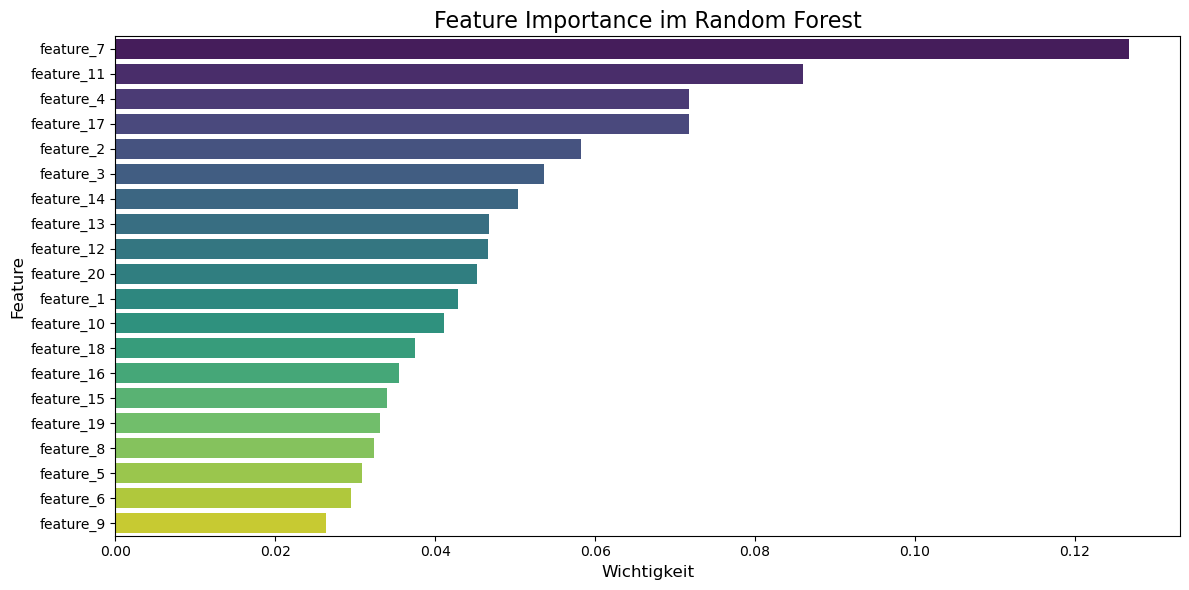

<Figure size 640x480 with 0 Axes>

In [26]:
# FEATURE IMPORTANCE VISUALISIEREN
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rfc.feature_importances_
}).sort_values(by='Importance', ascending=False)



# ANZEIGEN UND SPEICHERN
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis', legend=True)

# Titel und Achsenlabel
plt.title('Feature Importance im Random Forest', fontsize=16)
plt.xlabel('Wichtigkeit', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Layout anpassen und Plots anzeigen
plt.tight_layout()
plt.show()

# Optional: Speichern als PNG
plt.savefig('random_forest_feature_importance.png', dpi=300)